## Question 2 (50 points)

***This question consists of pseudocode, extracting a frequency numerically, and plotting. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for an anharmonic oscillator, we will create a figure that shows the angular frequency, $\omega$ versus the initial amplitude of the oscillator $Q_0$.

### The potential energy (notice the minus sign on the fourth-order term)

$$ \Delta U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6 $$

### Constrained parameters

Take $K = 1$, $D=2.4$, $\Phi=1$, and $M = 1$.

### Plotting constraints

Plot a range of initial displacements spanning $Q_0 = \pm 1.7$ (see the representative plot below)

### Extracting the angular frequency

Recall that in the second midterm and subsequent weeks we developed a strategy for a variant of this problem which used the following steps:

1. Solve the differential equation for $Q(t)$ for initial value $Q_0$ (take the initial velocity to be zero);
2. Use `ipywidgets` to explore this solution in a figure and extract approximate values of the period $T$ as a function of $Q_0$. We found $T$ by getting the time from peak to peak or valley to valley;
3. Interpolate the approximate values of $T$;
4. Use in interpolated values of $T$ as a guess for a minima finding algorithm;
5. Convert the extracted values of $T$ to angular frequency by $\omega=\frac{2\pi}{T}$.
6. To deal with the stationary solutions (e.g. $Q_0 = 0$), we used analytic results for the angular frequency by taking using the formula $\omega = \sqrt{\frac{1}{M}\frac{d^2\Delta U}{d Q^2}}$.

***This means you should be able to copy and paste most of the code from the midterm and subsequent weeks to optimize your effort***

### Steps to construct the plot

1. Write pseudocode to set up your strategy (**10 points**);
2. Expand your pseudocode to include INPUT, OUTPUT, and TESTS that you could use to program each custom function (**10 points**);
3. Write those functions and test them (**10 points**);
4. Combine your custom functions for streamlined code and the plot of $\omega$ versus $Q_0$ (**10 points**);
5. Describe the plot in your own words (**10 points**).

### Plot of the potential energy

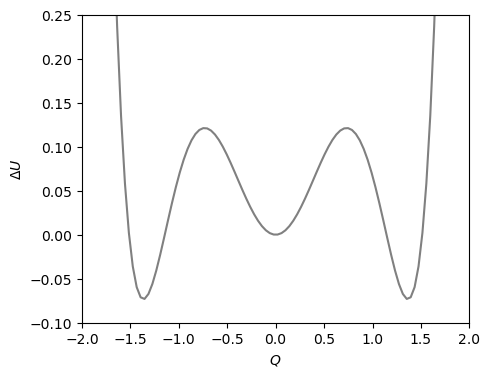

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# define potential function
def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
    return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6

# define mesh for plotting
Q_mesh = np.linspace(-2,2,100)
U_mesh = potential_energy(Q_mesh)

# construct figure
plt.figure(figsize=(5, 4))
plt.plot(Q_mesh, U_mesh, color="gray")
plt.xlabel("$Q$")
plt.ylabel("$\Delta U$")
plt.xlim(-2,2)
plt.ylim(-0.1,0.25)
plt.show()

In [ ]:
Psuedo Code
Import/Defone libraries being used

Create a force function that defines the potential energy derivative

Define an equation of motion with inputs such as time, Q and Q_intial, with parametters K, D, Phi, M
The output would be the derivatives Q, Q_intial

Now solve for Q(t) over time for a give Q_intial
Set the initial conditions and find the solution using sole_ivp
Inputs 

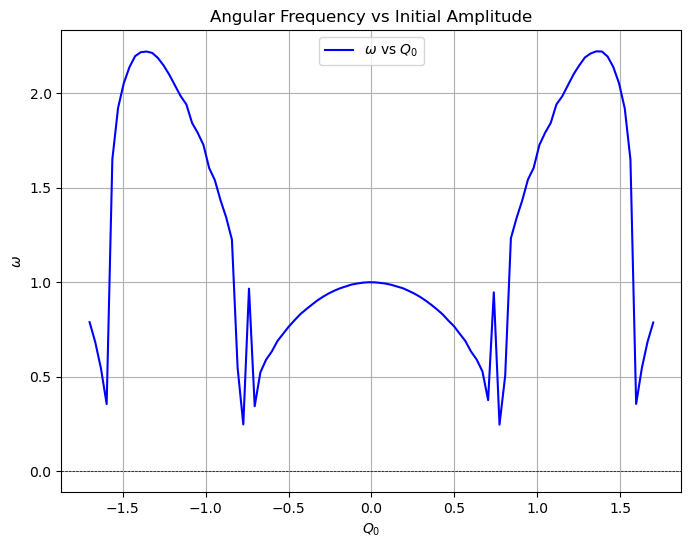

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

def force(Q, K=1.0, D=2.4, Phi=1.0):
    return -K * Q + D * Q**3 - Phi * Q**5


def equation_of_motion(t, y, K, D, Phi, M=1.0):
    Q, Q_dot = y  # y[0] = Q, y[1] = Q_dot
    Q_ddot = force(Q, K, D, Phi) / M
    return [Q_dot, Q_ddot]

def solve_motion(Q0, K, D, Phi, t_span, t_eval):
    y0 = [Q0, 0]  # Initial conditions: Q(0) = Q0, Q_dot(0) = 0
    solution = solve_ivp(equation_of_motion, t_span, y0, t_eval=t_eval, args=(K, D, Phi))
    return solution.t, solution.y[0]  # Return time and Q(t)

# Extract the period T
def extract_period(Q, t):
    peaks, _ = find_peaks(Q)  # Find peaks in Q(t)
    if len(peaks) > 1:
        periods = np.diff(t[peaks])  # Time differences between peaks
        return np.mean(periods)  # Return average period
    return None

# Main workflow
K, D, Phi = 1.0, 2.4, 1.0  # Parameters
Q0_range = np.linspace(-1.7, 1.7, 100)  # Range of Q0 values
t_span = (0, 50)  # Time span for the simulation
t_eval = np.linspace(0, 50, 1000)  # Time points for evaluation

omega_values = []
Q0_values = []

for Q0 in Q0_range:
    t, Q = solve_motion(Q0, K, D, Phi, t_span, t_eval)  # Solve the equation of motion
    T = extract_period(Q, t)  # Extract the period
    if T:  # If a valid period is found
        omega = 2 * np.pi / T  # Calculate angular frequency
        omega_values.append(omega)
        Q0_values.append(Q0)

# Plot ω vs. Q0
plt.figure(figsize=(8, 6))
plt.plot(Q0_values, omega_values, label=r'$\omega$ vs $Q_0$', color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel(r'$Q_0$')
plt.ylabel(r'$\omega$')
plt.title('Angular Frequency vs Initial Amplitude')
plt.grid(True)
plt.legend()
plt.show()
